# Análise exploratória de dados

In [1]:
#importar as libs
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency
import matplotlib.pyplot as plt

## 1. Leitura inicial dos dados

In [2]:
#importando o conjunto de dados
df = pd.read_csv('../data/raw/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## 2. Descrição do conjunto de dados

![ilustracao vinho](../images/ilustracao.jpeg)

O conjunto de dados **Spanish Wine Quality Data** está relacionado a variantes de vinhos tintos espanhóis. Esses dados  descrevem várias métricas de popularidade, especificações dos vinhos e além da qualidade dos vinhos. 

### 2.1 Dicionário de Dados

In [3]:
dicionario = pd.read_csv("../data/external/dictionary.csv")
dicionario

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícula,Qualitativa,Nominal
1,wine,Nome do vinho,Qualitativa,Nominal
2,year,Ano da safra do vinho,Quantitativa,Contínua
3,rating,Avaliação do vinho (1-5),Quantitativa,Discreta
4,num_reviews,Número de avaliações do vinho,Quantitativa,Discreta
5,country,País de origem do vinho,Qualitativa,Nominal
6,region,Região de origem do vinho,Qualitativa,Nominal
7,price,Preço do vinho em euros,Quantitativa,Contínua
8,type,Tipo do vinho,Qualitativa,Nominal
9,body,Classificação do corpo do vinho (1-5),Quantitativa,Discreta


- Conjunto com 11 variáveis, com 5 qualitativas nominais, 6 quantitativas, sendo 2 contínuas e 4 discretas.

### 2.1 Dados Nulos

In [4]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

Valores nulos: 
- Na coluna _ano_ apareceram 2 nulos
- Na coluna _tipo_ foram encontrados 545 nulos
- _Corpo_ e _Acidez_ tem grandes quantidades de valores nulos 1169.

## 3. Perguntas de partida e hipóteses

1. **A qualidade do vinho interfere no valor dele?**
- **Hipótese**: Quanto maior for a qualidade do vinho, maior será o seu valor de mercado.
2. **A região do vinho afeta sua qualidade?**
- **Hipótese**: Vinhos produzidos em regiões renomadas possuem, em média, uma qualidade superior em comparação com vinhos de regiões menos conhecidas.
3. **Vinhos mais baratos possuem notas inferiores?**
- **Hipótese**: Vinhos com preços mais baixos tendem a receber notas de avaliação mais baixas devido à menor complexidade e qualidade percebida.
4. **O tipo de vinho interfere no valor?**
- **Hipótese**: Vinhos tintos possuem um valor de mercado superior aos vinhos brancos, em média, devido à maior demanda e ao processo de produção geralmente mais elaborado.
5. **Qual a relação entre nota, preço e ano?**
- **Hipótese**: Vinhos com notas altas e de anos mais antigos possuem preços mais elevados.
6. **Qual a relação entre tipo de vinho, nota e número de reviews?**
- **Hipótese**: Vinhos com notas altas e de anos mais antigos possuem preços mais elevados, pois a qualidade reconhecida e o envelhecimento contribuem para uma valorização no mercado.
7. **Qual a relação entre a região e o tipo do vinho?**
- **Hipótese**: Certas regiões são mais propensas a produzir tipos específicos de vinho devido às suas condições climáticas e de solo.
8. **Qual a relação entre a região, a acidez e o corpo do vinho?**
- **Hipótese**: Vinhos de regiões mais frias tendem a ter maior acidez e corpo mais leve, enquanto vinhos de regiões mais quentes têm menor acidez e corpo mais encorpado.

### A qualidade do vinho interfere no valor dele?

Correlação entre qualidade e valor: 0.544808903502098


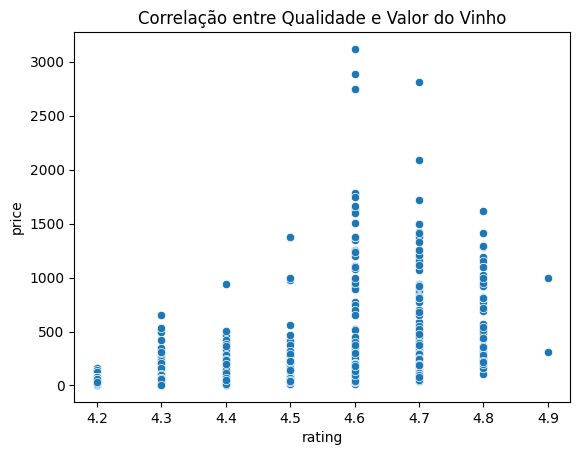

In [5]:
correlation = df['rating'].corr(df['price'])
print(f"Correlação entre qualidade e valor: {correlation}")

# Visualização da correlação
sns.scatterplot(data=df, x='rating', y='price')
plt.title('Correlação entre Qualidade e Valor do Vinho')
plt.show()

**Correlação de Pearson - Explicação**
- Esta medida é utilizada para avaliar o relacionamento linear entre duas variáveis contínuas. 
- É adequada quando os dados seguem uma distribuição normal e quando a relação entre as variáveis é linear.
- A correlação de Pearson varia de -1 a 1, onde -1 indica uma relação negativa perfeita, 0 indica ausência de correlação e 1 indica uma relação positiva perfeita.

**Análise**
- Um valor de 0.5448 indica uma correlação positiva moderada. Isso significa que, em geral, à medida que a pontuação dos vinhos aumenta, o preço também tende a aumentar.
- A correlação não implica causalidade. Embora haja uma relação entre preço e pontuação, isso não significa necessariamente que a pontuação alta causa o aumento do preço ou vice-versa. Outros fatores podem influenciar tanto o preço quanto a pontuação, como a reputação do produtor, a raridade do vinho, e preferências de mercado. Isso pode ser visto no rating 4.6, que apesar de não ser o maior score, tem preços que se destacam.

**Comentários**
- Número de pessoas que fizeram reviews impacta na quantidade de vinhos apresentada.
- Necessário Limpar os dados dos outliers.
- 4.2 e 4.3 tem os valores mais baixos.

### **A região do vinho afeta sua qualidade?**

In [6]:
# Responder hipótese

### **Vinhos mais baratos possuem notas inferiores?**

In [7]:
#descrição estatística do preço e score
print(df[['price', 'rating']].describe())

             price       rating
count  7500.000000  7500.000000
mean     60.095822     4.254933
std     150.356676     0.118029
min       4.990000     4.200000
25%      18.900000     4.200000
50%      28.530000     4.200000
75%      51.350000     4.200000
max    3119.080000     4.900000


**Comentários**
- Menor preço: 4.99
- Maior preço: 3119
- Mesmo tendo valores muito altos, a média de preços ainda se mantem em 60, indicando que tem muitos vinhos com valores baixos.

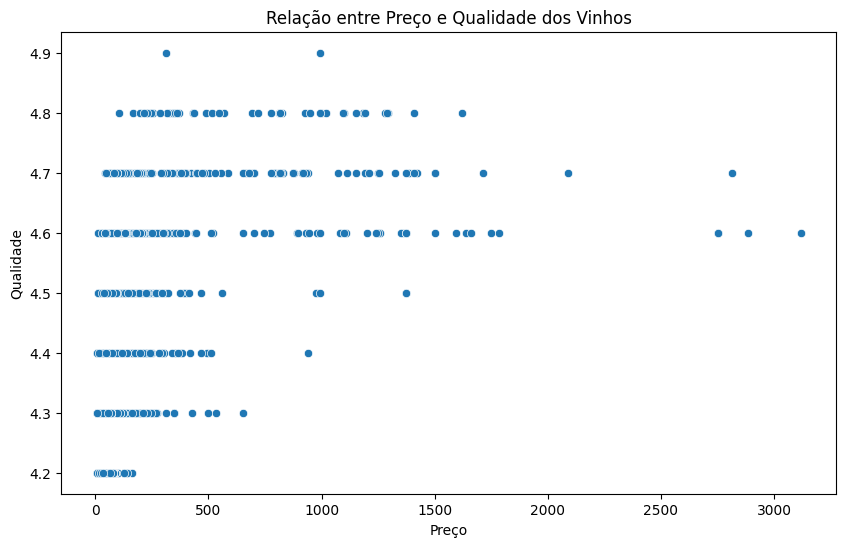

In [8]:
# Gráfico de dispersão entre preço e qualidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df)
plt.title('Relação entre Preço e Qualidade dos Vinhos')
plt.xlabel('Preço')
plt.ylabel('Qualidade')
plt.show()

**Análise**
- Vinhos mais baratos apresentam diferentes scores. No entanto, as notas mais baixas (4.3 e 4.2) apresentam apenas vinhos na menos faixa de preço.

**Comentário**
- Intervalo de valores está muito grande, impedindo a visualização de vinhos de valores mais baixos.

### **O tipo de vinho interfere no valor?**

In [9]:
#descrição estatística dos tipos de vinho
df.groupby('type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Albarino,252.0,18.114673,5.295559,11.900000,16.7800,16.780,16.7800,59.95
Cabernet Sauvignon,11.0,51.090000,16.426115,16.900000,45.1500,55.000,63.9150,67.45
Cava,33.0,60.547576,34.081698,7.890000,40.3300,53.700,75.5000,164.66
Chardonnay,13.0,78.114615,74.414651,15.750000,28.4000,50.900,112.7600,249.95
Grenache,35.0,57.506286,47.087446,13.950000,27.6450,36.900,80.9500,197.00
Mencia,235.0,21.244170,20.870947,17.900000,17.9000,17.900,17.9000,269.95
Monastrell,18.0,38.637778,19.707725,8.950000,28.6000,34.385,55.8675,77.98
Montsant Red,17.0,72.024118,47.386883,16.250000,36.9300,51.050,119.0000,157.95
Pedro Ximenez,35.0,148.874286,138.836991,17.500000,34.5650,114.500,216.0000,701.05


- De acordo com o min e max, é possível perceber que o mesmo tipo de vinho pode ser muito barato ou muito caro. (Ex: Ribera Del Duero Red tem min de 7.9 e max de 2884).

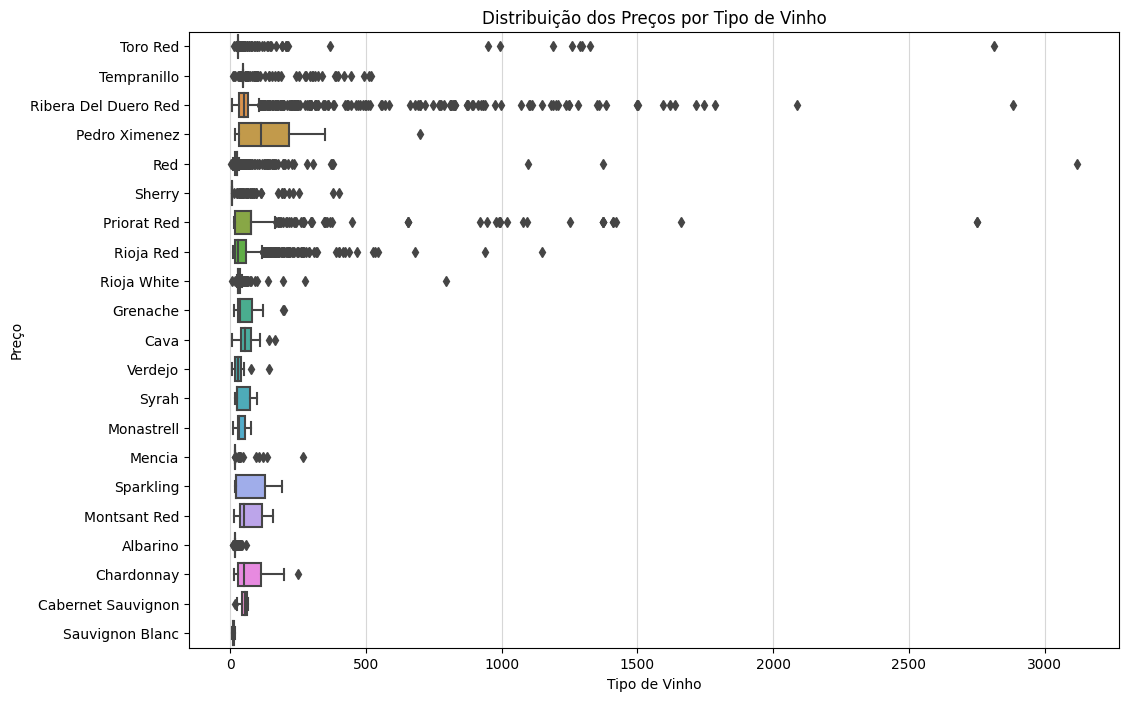

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='type', data=df)
plt.title('Distribuição dos Preços por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Preço')
plt.grid(axis='x', linestyle='-', alpha=0.5)

plt.show()

* Com esta análise não podemos concluir que o tipo de vinho interfira diretamente no preço. Pode-se observar que os tipos de vinhos possuem valores aproximados, desconsiderando os outliers.
* Os outliers indicam que um mesmo tipo de vinho pode ter valores baixos e muito altos. Este fato pode estar interligado com a qualidade do vinho, medida pelo _rating_ (reviews).
* O único tipo de vinho que apresenta uma maior variedade de valor é o _Pedro Ximenez_.

### **Qual a relação entre nota, preço e ano?**

In [11]:
# Preencher ou remover valores ausentes
df.dropna(subset=['rating', 'price', 'year'], inplace=True)

In [12]:
print(df[['rating', 'price']].describe())

            rating        price
count  7498.000000  7498.000000
mean      4.254855    60.050035
std       0.117921   150.317962
min       4.200000     4.990000
25%       4.200000    18.900000
50%       4.200000    28.530000
75%       4.200000    51.350000
max       4.900000  3119.080000


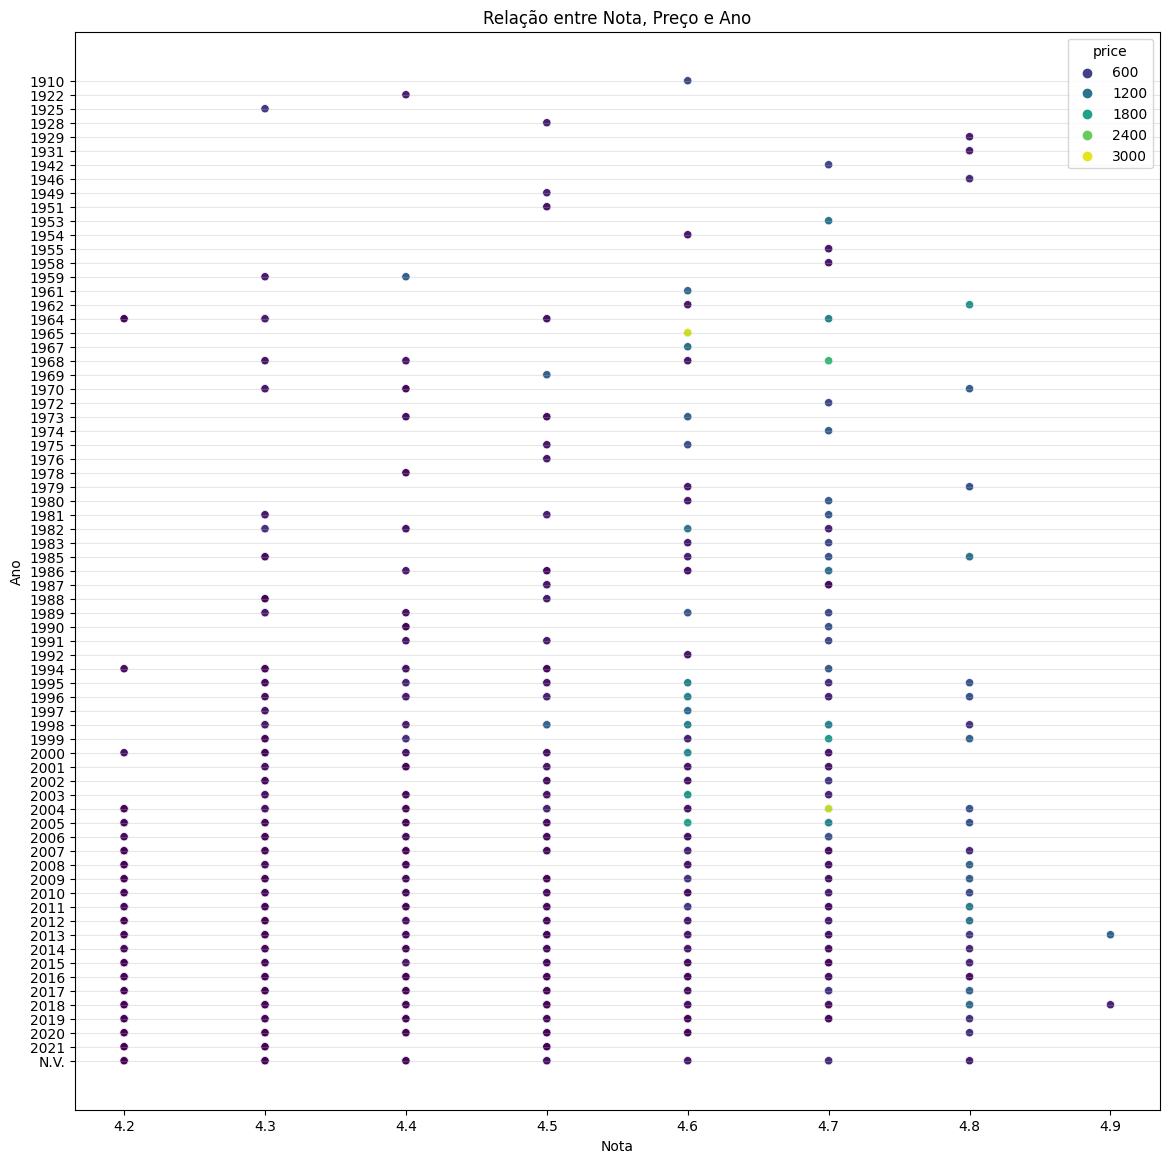

In [13]:
# Ordena os dados pelo ano
df_ordenado = df.sort_values(by='year')

plt.figure(figsize=(14, 14))
sns.scatterplot(data=df_ordenado, x='rating', y='year', hue='price', palette='viridis', hue_norm=(df_ordenado['price'].min(), df_ordenado['price'].max()))
plt.title('Relação entre Nota, Preço e Ano')
plt.xlabel('Nota')
plt.ylabel('Ano')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

* Os vinhos mais caros (3000 euros), no geral, não obteve notas melhores que os vinhos mais baratos, estando com _4.6_ e _4.7_ de nota. No qual, um está entre os mais antigos e o outro é recente [2004].

* Não há tanta relação com os vinhos mais baratos, visto que eles estão em todos os scores disponíveis. Independente do ano e de seu preço, os vinhos que valem até 600 euros possuem avaliações boas e ruins.

* Os vinhos com preço médio, entre 1200 e 1800, possuem boas avaliações. A maioria destes vinhos estão classificados entre _4.6_ e _4.9_ (maior avaliação). 

* Em geral, os vinhos mais velhos estão entre as melhores avaliações, possuíndo poucos com avaliação baixa. Entretanto, há alguns mais recentes que também possuem boas avaliações. Estes podem ser considerados outliers e devem estar sendo determinado por outras variáveis, como o _corpo_ e _acidez_ do vinho.

* Apenas dois vinhos foram classificados com _4.9_, ambos são de anos recentes [2013-2018] e estão entre os preços mais baixos [600-1200 euros].

Portanto, conclui-se que o preço não está diretamente relacionado ao score do vinho. Por outro lado, o ano possui certa influência nesta classificação.

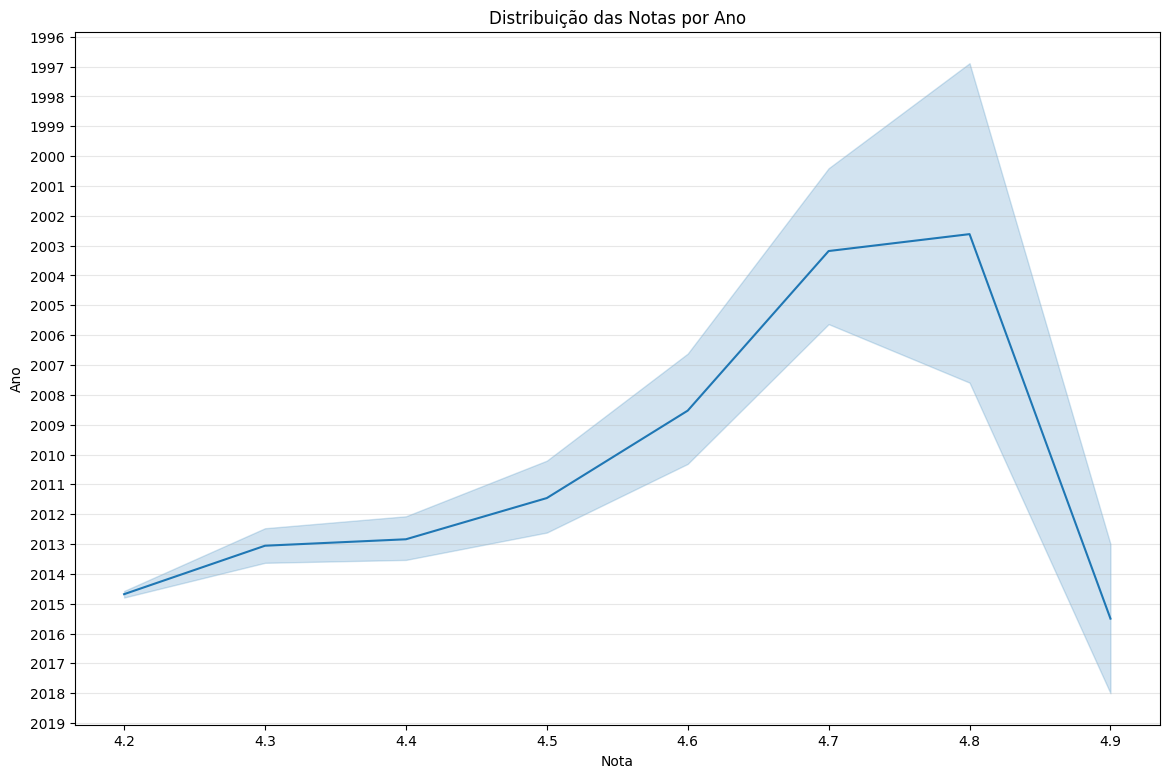

In [14]:
# Ordena os dados pelo ano
df_ordenado = df.sort_values(by='year')

plt.figure(figsize=(14, 9))
sns.lineplot(data=df_ordenado, x='rating', y='year', palette='viridis', hue_norm=(df_ordenado['price'].min(), df_ordenado['price'].max()))
plt.title('Distribuição das Notas por Ano')
plt.xlabel('Nota')
plt.ylabel('Ano')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

* Esta visualização demonstra que, de maneira geral, vinhos mais antigos tendem a ter uma classificação mais alta.

          rating     price
rating  1.000000  0.544399
price   0.544399  1.000000


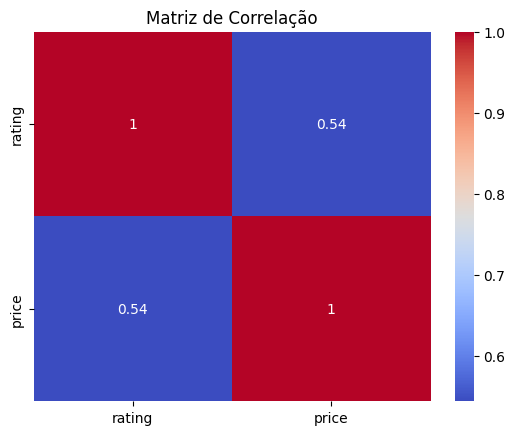

In [15]:
#Retira a variável 'year'
correlation_matrix = df[['rating', 'price']].corr()
print(correlation_matrix)

# Visualizar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

- Correlação positiva de 0.544 sugere que há uma tendência de que vinhos mais caros recebam scores mais altos, mas essa tendência não é muito forte. Existem exceções onde vinhos mais baratos podem ter scores altos e vinhos mais caros podem ter scores mais baixos.

### **Qual a relação entre tipo de vinho, nota e número de reviews?**

In [29]:
# Agrupando por tipo de vinho e calculando estatísticas descritivas
type_summary = df.groupby('type').agg({
    'rating': ['mean', 'std', 'count'],
    'num_reviews': ['mean', 'std', 'count']
}).reset_index()

print(type_summary)

                    type    rating                 num_reviews               \
                              mean       std count        mean          std   
0               Albarino  4.214683  0.047891   252  413.654762   349.646999   
1     Cabernet Sauvignon  4.318182  0.087386    11  888.363636  1103.582826   
2                   Cava  4.412121  0.119262    33  161.787879   247.674781   
3             Chardonnay  4.330769  0.085485    13  234.769231   211.578257   
4               Grenache  4.377143  0.126225    35  425.542857   582.100423   
5                 Mencia  4.210638  0.050780   235  396.404255    81.431283   
6             Monastrell  4.372222  0.117851    18  221.055556   212.699587   
7           Montsant Red  4.352941  0.071743    17  106.058824    65.654846   
8          Pedro Ximenez  4.494286  0.173108    35  182.828571   282.000259   
9            Priorat Red  4.270623  0.124778   674  335.022255   199.407192   
10                   Red  4.242708  0.100139   864  

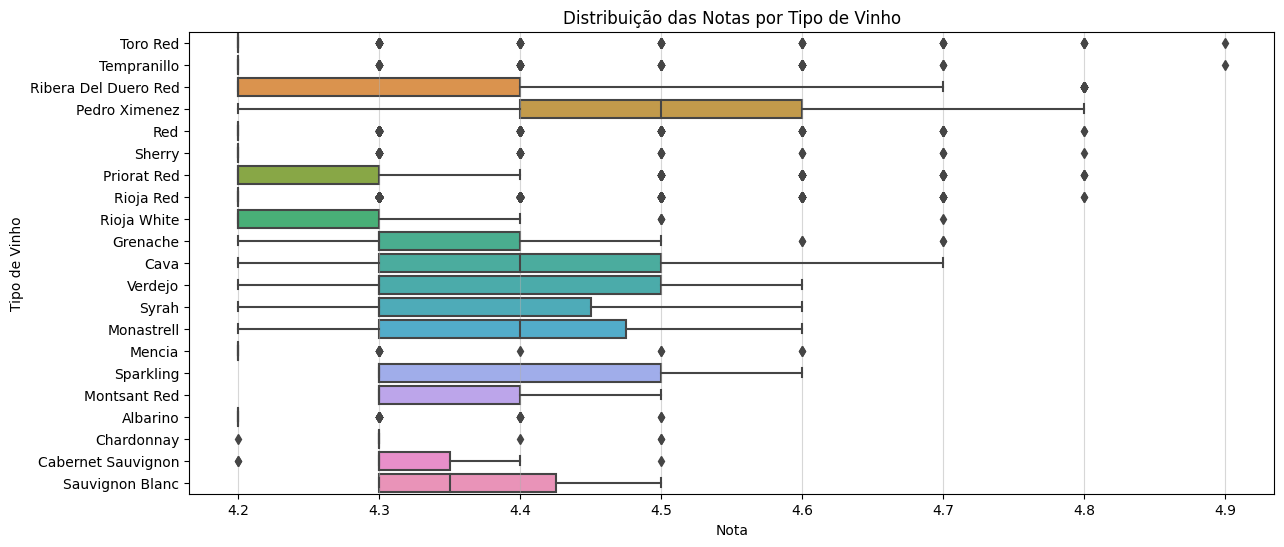

In [30]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=df, x='rating', y='type')
plt.title('Distribuição das Notas por Tipo de Vinho')
plt.ylabel('Tipo de Vinho')
plt.xlabel('Nota')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.show()

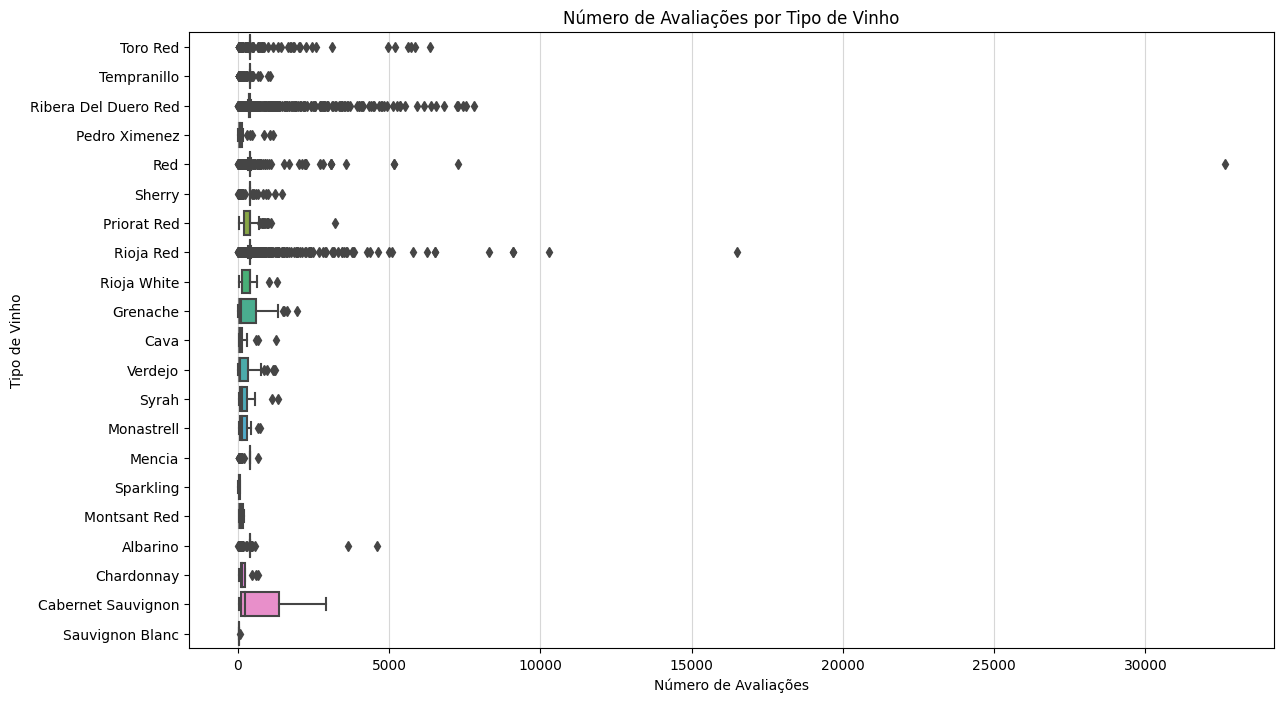

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='num_reviews', y='type')
plt.title('Número de Avaliações por Tipo de Vinho')
plt.xlabel('Número de Avaliações')
plt.ylabel('Tipo de Vinho')
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.show()

* Vinhos com pouca variabilidade no número de avaliações (com outliers concentrados em uma faixa específica) tendem a exibir uma baixa variabilidade nas notas. Esses vinhos geralmente mostram uma distribuição de notas mais uniforme, embora ainda apresentem alguns outliers.

* Vinhos com um número reduzido de avaliações, como _Sparkling_, apresentam uma maior variação nas notas. A menor quantidade de avaliações pode resultar em uma gama mais ampla de opiniões, refletindo uma variabilidade maior nas notas atribuídas.

In [19]:
# Calculando a correlação entre nota e número de reviews por tipo de vinho
correlation_by_type = df.groupby('type').apply(lambda x: x['rating'].corr(x['num_reviews']))
print(correlation_by_type)

type
Albarino               -0.267293
Cabernet Sauvignon     -0.556184
Cava                   -0.289577
Chardonnay             -0.378765
Grenache               -0.147574
Mencia                 -0.853758
Monastrell             -0.529342
Montsant Red            0.102795
Pedro Ximenez          -0.306330
Priorat Red            -0.541891
Red                    -0.054796
Ribera Del Duero Red    0.148128
Rioja Red              -0.000054
Rioja White            -0.621664
Sauvignon Blanc        -0.662135
Sherry                 -0.536583
Sparkling              -0.165609
Syrah                  -0.605175
Tempranillo            -0.657290
Toro Red                0.101261
Verdejo                -0.079867
dtype: float64


### **Qual a relação entre a região e o tipo do vinho?**

In [20]:
# Contagem dos tipos de vinho por região
#Muitos tipos e muitas regiões (não é possível ver tudo)
region_type_counts = df.groupby(['type', 'region']).size().unstack(fill_value=0)
print(region_type_counts)

region                Rias Baixas  Vino de Espana  Dehesa del Carrizal  \
type                                                                     
Albarino                      251               1                    0   
Cabernet Sauvignon              0               0                    1   
Cava                            0               0                    0   
Chardonnay                      0               0                    0   
Grenache                        0               0                    0   
Mencia                          0               0                    0   
Monastrell                      0               1                    0   
Montsant Red                    0               0                    0   
Pedro Ximenez                   0               0                    0   
Priorat Red                     0               0                    0   
Red                             0               1                    2   
Ribera Del Duero Red            0     

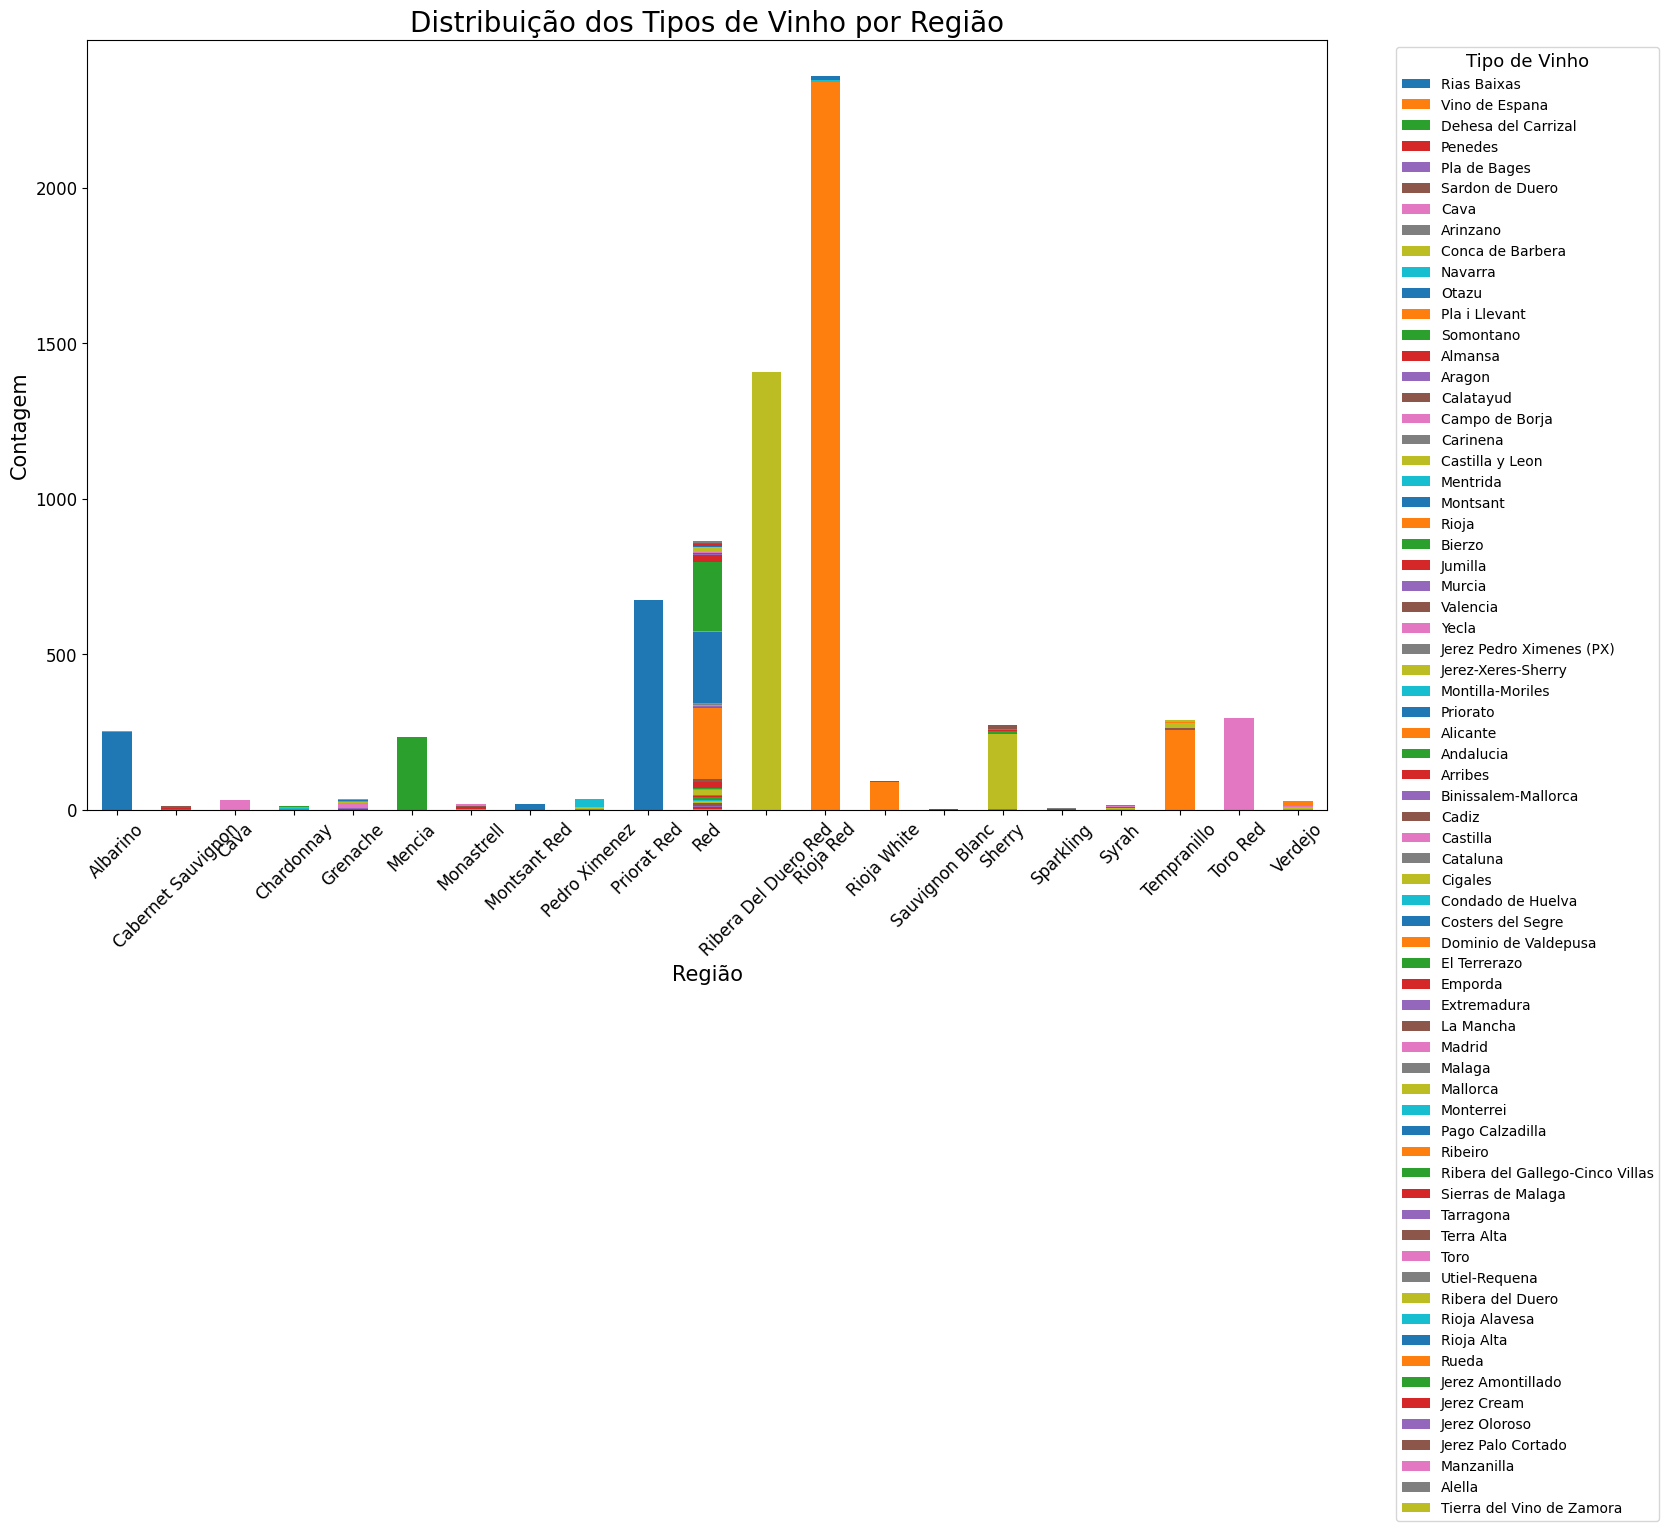

In [21]:
# Temos problemas com os gráficos pois são muitos tipos de vinho, mas a maioria tem uma quantidade muito pequena!
# Tipos se perdem nas cores


# Gráfico de barras empilhadas
region_type_counts.plot(kind='bar', stacked=True, figsize=(16, 10))

# Ajustando título e rótulos
plt.title('Distribuição dos Tipos de Vinho por Região', fontsize=20)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Contagem', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#ajusta a legenda (tamanho e local)
plt.legend(title='Tipo de Vinho', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.show()

In [22]:
# Teste qui-quadrado usado para determinar se há uma associação significativa entre duas variáveis categóricas.
#chi2: O valor do qui-quadrado calculado. p: O valor p associado ao teste.
#dof: Os graus de liberdade do teste. expected: A tabela de frequências esperadas, assumindo que as duas variáveis são independentes.

chi2, p, dof, expected = chi2_contingency(region_type_counts)
print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")

# Interpretando o p-valor
alpha = 0.05
if p < alpha:
    print("Há uma relação significativa entre a região e o tipo de vinho (rejeita H0).")
else:
    print("Não há uma relação significativa entre a região e o tipo de vinho (não rejeita H0).")

#Hipótese Nula (H0): Não há associação entre a região e o tipo de vinho (as variáveis são independentes).
#Hipótese Alternativa (H1): Há uma associação significativa entre a região e o tipo de vinho.

Chi-squared: 94038.12858385286
p-value: 0.0
Há uma relação significativa entre a região e o tipo de vinho (rejeita H0).


### **Qual a relação entre a região, a acidez e o corpo do vinho?**

In [23]:
#Muitos valores nulos - reorganizar!

# Agrupando por região
grouped = df.groupby('region')

# Calculando as estatísticas descritivas para acidez e corpo
summary = grouped[['acidity', 'body']].describe()
print(summary)

               acidity                                                body  \
                 count      mean       std  min  25%  50%  75%  max  count   
region                                                                       
Abona              0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN    0.0   
Alella             2.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    2.0   
Alicante         206.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  206.0   
Almansa            7.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    7.0   
Andalucia          2.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    2.0   
...                ...       ...       ...  ...  ...  ...  ...  ...    ...   
Valdejalon         0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN    0.0   
Valdeorras         0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN    0.0   
Valencia           8.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    8.0   
Vino de Espana   239.0  2.016736  0.128551  2.0  2.0  2.0  2.0  

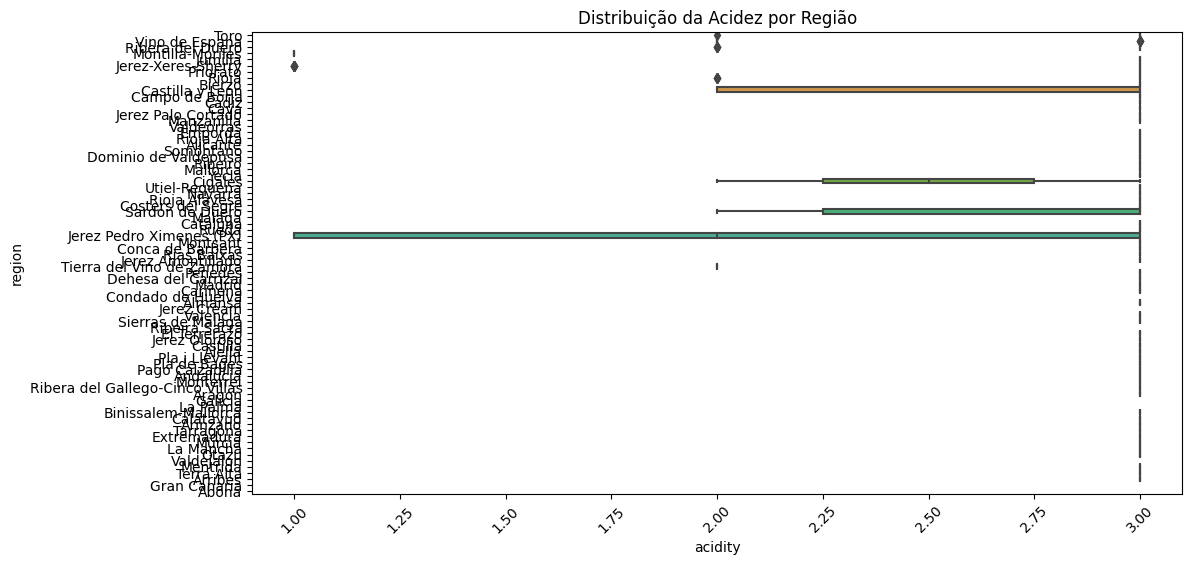

In [24]:
#Tudo nesse gráfico parece errado kkk :'/

# Boxplot para acidez por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='acidity', y='region', data=df)
plt.title('Distribuição da Acidez por Região')
plt.xticks(rotation=45)
plt.show()

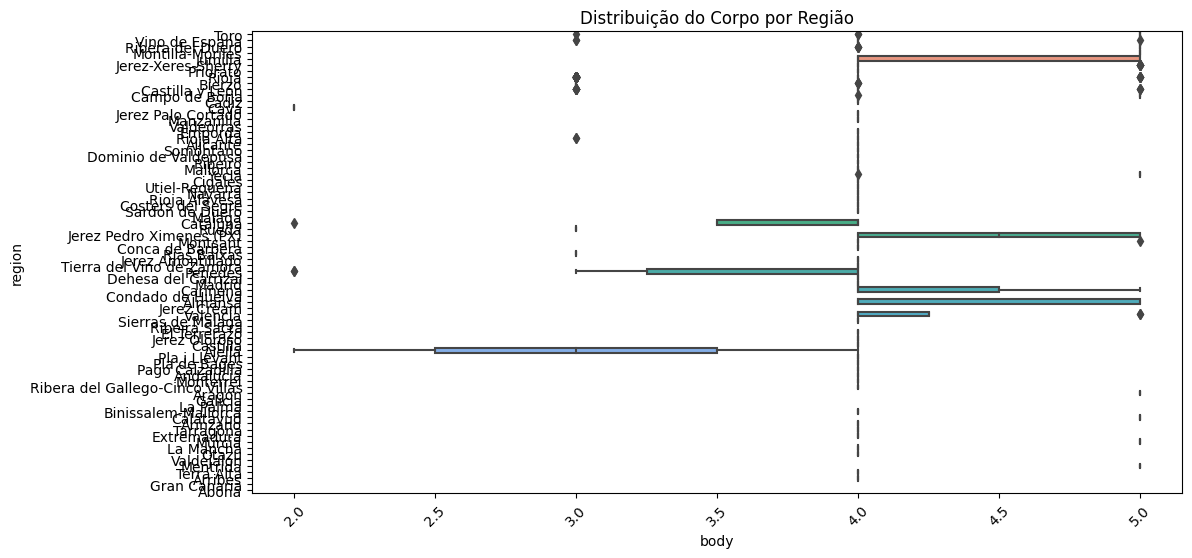

In [25]:
# Boxplot para corpo por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='body', y='region', data=df)
plt.title('Distribuição do Corpo por Região')
plt.xticks(rotation=45)
plt.show()

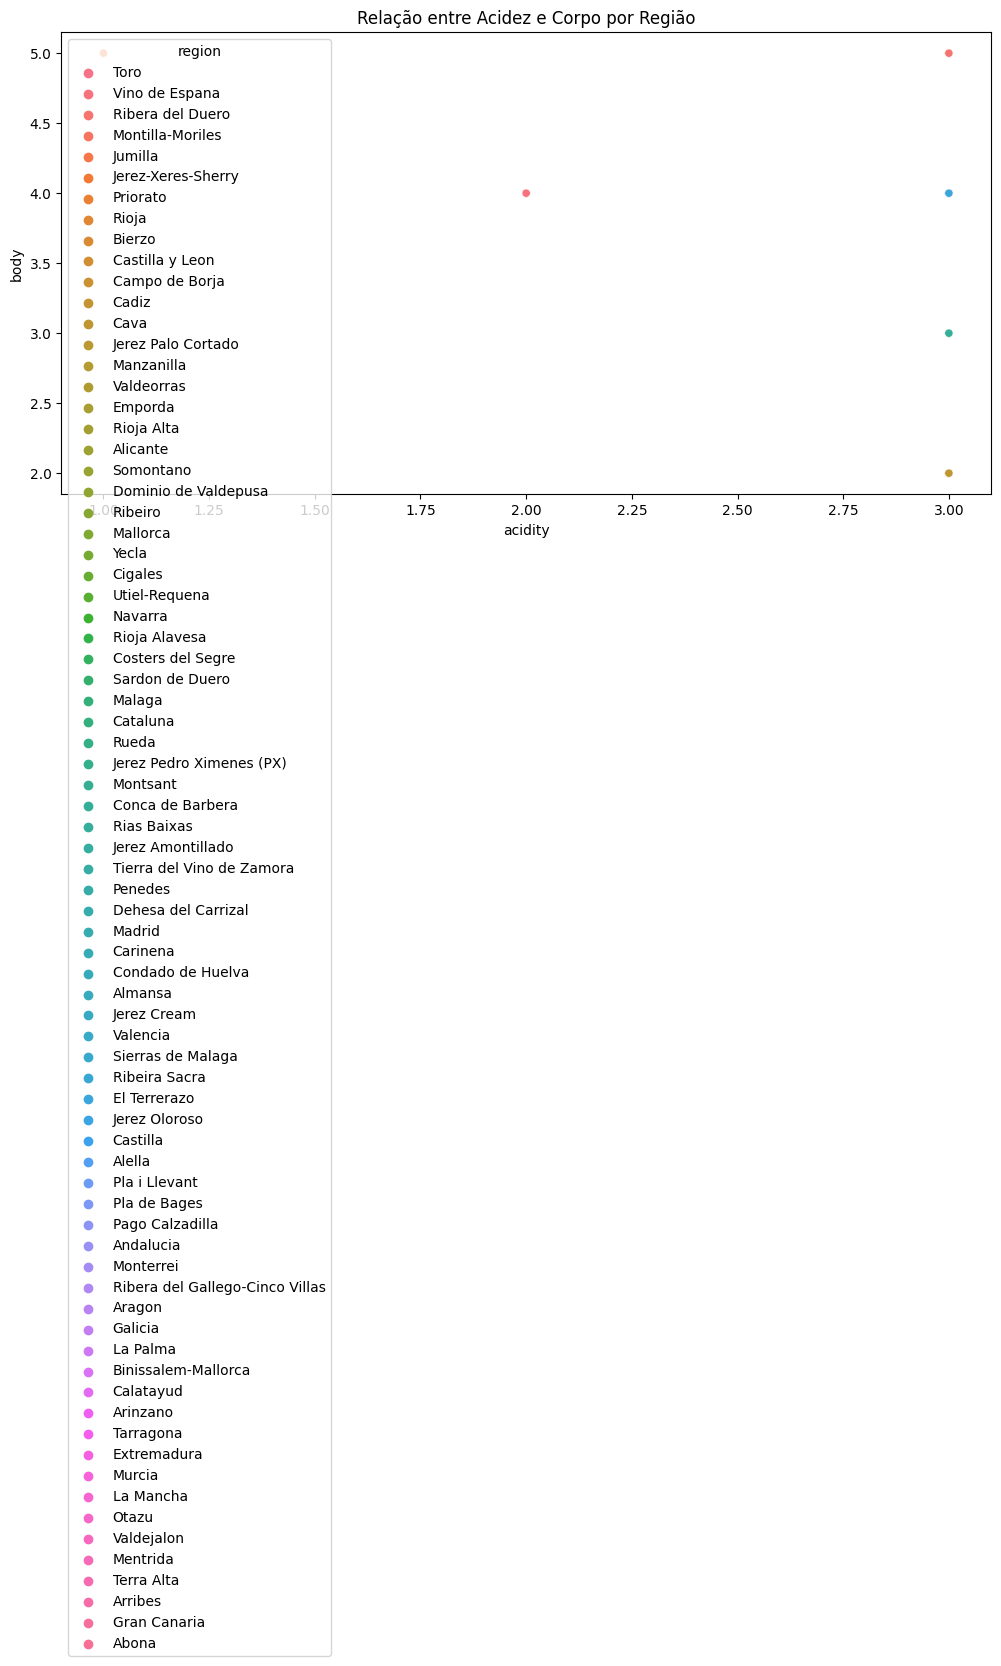

In [26]:
#

# Scatter plot para acidez vs corpo, colorido por região
plt.figure(figsize=(12, 6))
sns.scatterplot(x='acidity', y='body', hue='region', data=df)
plt.title('Relação entre Acidez e Corpo por Região')
plt.show()

## 3. Insights